In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sp

In [63]:
general_results = pd.DataFrame(pd.read_csv("GeneralMeasure-030518_5runs_per_file.csv"))

In [30]:
print(general_results.mean())
print(general_results.min())
print(general_results.max())
print(general_results.std())

CA                                      61.117999
Total Hits in Event                   2422.100000
Maximum number of Hits in a Sensor      65.400000
dtype: float64
CA                                      2.14042
Total Hits in Event                   775.00000
Maximum number of Hits in a Sensor     28.00000
dtype: float64
CA                                     248.464087
Total Hits in Event                   4352.000000
Maximum number of Hits in a Sensor     119.000000
dtype: float64
CA                                      64.001947
Total Hits in Event                   1059.114368
Maximum number of Hits in a Sensor      25.309626
dtype: float64


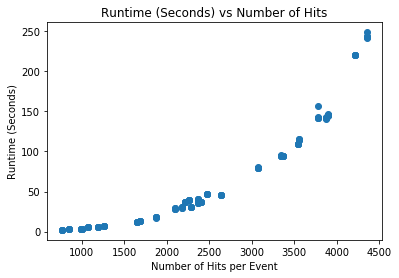

In [83]:
plt.scatter(x=general_results["Total Hits in Event"], y=general_results["CA"])
plt.xlabel("Number of Hits per Event")
plt.ylabel("Runtime (Seconds)")
plt.title("Runtime (Seconds) vs Number of Hits")
plt.savefig("/home/julius/Projects/MasterThesis-Tex/Images/Chapter5/runtimeHitsScatter.png", dpi=500)

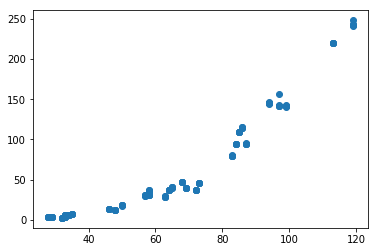

In [35]:
plt.scatter(x=general_results["Maximum number of Hits in a Sensor"], y=general_results["CA"])

In [38]:
def curve_fit(x,a,b):
    return (a*b**(x))

In [40]:
popt, pcurv = sp.curve_fit(xdata=general_results["Total Hits in Event"], ydata=general_results["CA"], f=curve_fit)

In [78]:
xdata=general_results["Total Hits in Event"].unique()
xdata= np.sort(xdata)
ydata=curve_fit(xdata, *popt)


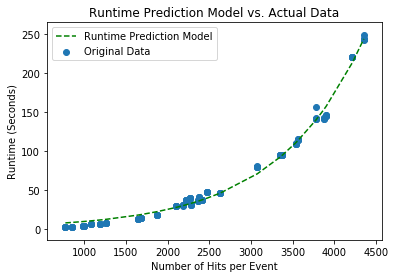

In [88]:
handle1 = plt.plot(xdata, ydata, '--g', label='Runtime Prediction Model')
handle2 = plt.scatter(x=general_results["Total Hits in Event"], y=general_results["CA"], label='Original Data')
plt.xlabel("Number of Hits per Event")
plt.ylabel("Runtime (Seconds)")
plt.title("Runtime Prediction Model vs. Actual Data")
plt.legend()
plt.savefig("/home/julius/Projects/MasterThesis-Tex/Images/Chapter5/ExponentialModelPython.png", dpi=500)

# Detailed Measure

In [2]:
results = pd.DataFrame(pd.read_csv("DetailedMeasure-030518_5runs_per_file.csv"))

In [3]:
print(results.mean(axis=0))
print(results.min(axis=0))
print(results.max(axis=0))
print(results.std(axis=0))

Doublet Creation                         0.959302
Neighbour search                        57.548154
CA                                       1.236328
Extract Possible Tracks                  1.660354
Remove Short                             0.001644
Remove Ghost and Clones                  0.324627
Full Time                               61.730884
Total Hits in Event                   2422.100000
Maximum number of Hits in a Sensor      65.400000
dtype: float64
Doublet Creation                        0.076521
Neighbour search                        1.713438
CA                                      0.089174
Extract Possible Tracks                 0.251962
Remove Short                            0.000163
Remove Ghost and Clones                 0.012597
Full Time                               2.162797
Total Hits in Event                   775.000000
Maximum number of Hits in a Sensor     28.000000
dtype: float64
Doublet Creation                         2.759221
Neighbour search             

In [7]:
percentages = pd.DataFrame(columns=["% Doublet Creation", "% Neighbour Search", "% CA", "% Extract Possible Tracks", "% Remove Shorts", "% Remove Ghost and Clones"])
percentages["% Doublet Creation"] = results["Doublet Creation"]/results["Full Time"]
percentages["% Neighbour Search"] = results["Neighbour search"]/results["Full Time"]
percentages["% CA"] = results["CA"]/results["Full Time"]
percentages["% Extract Possible Tracks"] = results["Extract Possible Tracks"]/results["Full Time"]
percentages["% Remove Shorts"] = results["Remove Short"]/results["Full Time"]
percentages["% Remove Ghost and Clones"] = results["Remove Ghost and Clones"]/results["Full Time"]

In [29]:
N = 6
width=0.35

ind = np.arange(N)

meanPercentages = percentages.mean()
standardDev = percentages.std()

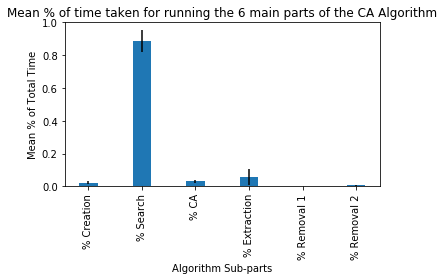

In [49]:
fig, ax = plt.subplots()
ax.bar(ind, meanPercentages, width, yerr = standardDev)
ax.set_xticks(ind)
ax.set_xticklabels(("% Creation", "% Search", "% CA", "% Extraction", "% Removal 1", "% Removal 2"), rotation = 90)
ax.set_xlabel("Algorithm Sub-parts")
ax.set_ylabel("Mean % of Total Time")
ax.set_title("Mean % of time taken for running the 6 main parts of the CA Algorithm")
plt.tight_layout()
plt.savefig("/home/julius/Projects/MasterThesis-Tex/Images/Chapter5/DetailedAnalysisPython.png", dpi=500)
plt.show()
